### 1. Dataset description
The dataset includes 501 sound samples from 10 classes, which are:

Number | Class| Number of samples | Duration of each sample|
-------|------|-------------------|---------------|
  0    | car horn |48|1.85-4.95s|
  1    |drilling | 50| 0.90-4.34s|
  2    |footsteps| 50| 2.05-4.65s|
  3    |hand hammer| 54| 2.55-4.35s|
  4    |hand saw| 53| 3.15-4.75s|
  5    |jackhammer| 47| 0.90-4.14s|
  6    |raining| 49| 3.35-4.83s|
  7    |shoveling| 53| 1.15-4.04s|
  8    |thunderstorm| 48| 2.85-4.74s|
  9    |welding| 49| 3.35-4.04s|
  10   |Total| 501| 1816.6s|
  
* The data are in .mat format;
* First row of the data represent phase information extracted from DAS system;
* Second row of the data represent differential intensity information extracted from DAS system;
* The sampling rate is 10KHz;


### 2. Liboraries 
#### a) Ipython.display.Audio
This let us play audio directly in an IPython notebook

#### b) Librosa
It is a Python package for audio analysis. 

### 3. Auditory inspection

In [1]:
import numpy as np
import scipy.io
import h5py
filepath = './DAS1K/CARHORN/carhorn1.mat'   ### You can change the filepath to check another 9 classes
SIGNAL = {}
f = h5py.File(filepath)
for k, v in f.items():
    SIGNAL[k] = np.array(v)
SIGNAL=SIGNAL['carhorn1']     
print(SIGNAL.shape)

(2, 39450)


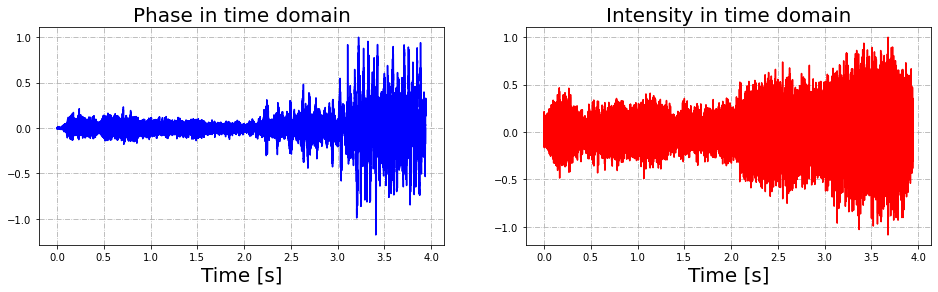

In [3]:
# plot the intensity and phase in time domain 
import matplotlib.pyplot as plt
fs=10000
### intensity 

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(SIGNAL[0,:]))/fs,SIGNAL[0,:],'b')
plt.grid(linestyle='-.')
plt.xlabel('Time [s]', fontsize=20)
plt.title('Phase in time domain', fontsize=20)


### phase
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(SIGNAL[1,:]))/fs,SIGNAL[1,:],'r')
plt.grid(linestyle='-.')
plt.xlabel('Time [s]', fontsize=20)
plt.title('Intensity in time domain', fontsize=20)
plt.show()

In [4]:
import IPython.display as ipd
fs=10000
print('Phase audio')
ipd.Audio(SIGNAL[0,:], rate=fs)


Phase audio


In [5]:
print('Intensity audio')
ipd.Audio(SIGNAL[1,:], rate=fs)


Intensity audio


### 4. Signal analysis

#### a). FFT

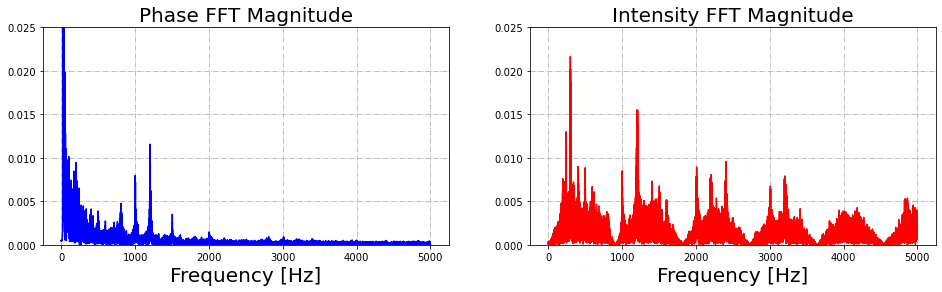

In [6]:
from scipy.fft import fft
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
N = len(SIGNAL[0,:])
# sample spacing
T = 1.0 /(fs)
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf0 = fft(SIGNAL[0,:])
plt.plot(xf, 2.0/N * np.abs(yf0[0:N//2]),'b')
plt.ylim([0,0.025])
plt.grid(linestyle='-.')
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.title('Phase FFT Magnitude', fontsize=20)

plt.subplot(1, 2, 2)
yf1 = fft(SIGNAL[1,:])
plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]),'r')
plt.ylim([0,0.025])
plt.title('Intensity FFT Magnitude', fontsize=20)
plt.grid(linestyle='-.')
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.show()

#### b). STFT

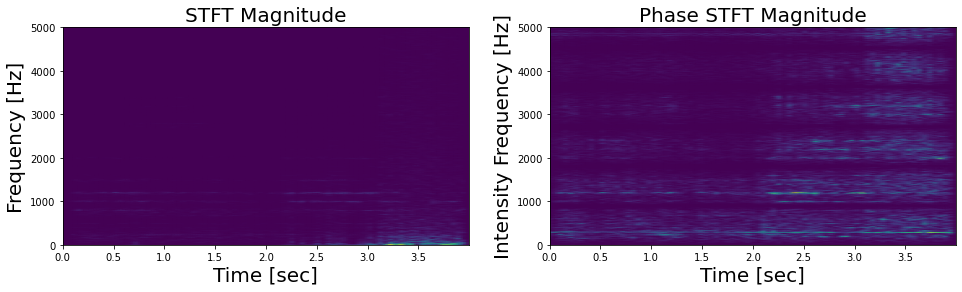

In [7]:
import math
from scipy import signal
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
f, t, Zxx = signal.stft(SIGNAL[0,:], fs=fs,nperseg=1024)
plt.pcolormesh(t, (f), (np.abs(Zxx)),vmin=np.min(np.abs(Zxx)), vmax=np.max(np.abs(Zxx)),shading='gouraud')
plt.title('STFT Magnitude', fontsize=20)
plt.ylabel('Frequency [Hz]', fontsize=20)
plt.xlabel('Time [sec]', fontsize=20)

plt.subplot(1, 2, 2)
f, t, Zxx = signal.stft(SIGNAL[1,:], fs=fs,nperseg=1024)
plt.pcolormesh(t, (f), (np.abs(Zxx)),vmin=np.min(np.abs(Zxx)), vmax=np.max(np.abs(Zxx)),shading='gouraud')
plt.title('Phase STFT Magnitude', fontsize=20)
plt.ylabel('Intensity Frequency [Hz]', fontsize=20)
plt.xlabel('Time [sec]', fontsize=20)
plt.show()

#### c). Mel-spectrogram

C:\Users\Joyce_Huan\Anaconda3\envs\keras-gpu\lib\site-packages\librosa\display.py:831: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Joyce_Huan\Anaconda3\envs\keras-gpu\lib\site-packages\librosa\display.py:831: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


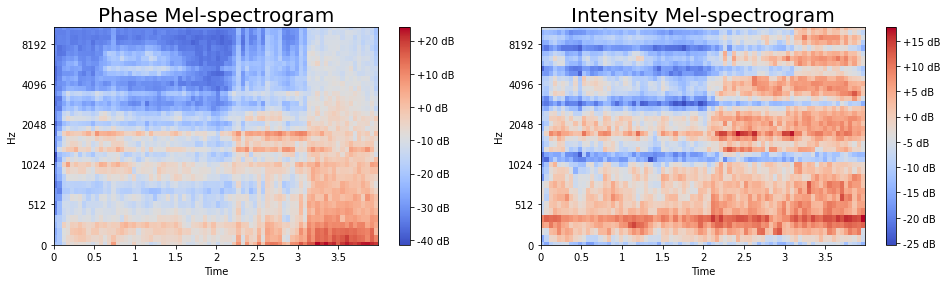

In [8]:
import librosa
import librosa.display
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)

melspec = librosa.feature.melspectrogram(SIGNAL[0,:], fs, n_fft=1024, hop_length=512, n_mels=40)
logmelspec = librosa.power_to_db(melspec)      
librosa.display.specshow(logmelspec, sr=fs, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')      
plt.title('Phase Mel-spectrogram', fontsize=20)

plt.subplot(1, 2, 2)
melspec = librosa.feature.melspectrogram(SIGNAL[1,:], fs, n_fft=1024, hop_length=512, n_mels=40)
logmelspec = librosa.power_to_db(melspec)      
librosa.display.specshow(logmelspec, sr=fs, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')      
plt.title('Intensity Mel-spectrogram', fontsize=20)
